In [1]:
import random
import numpy as np
from numpy.random import seed
from numpy.random import randint
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
def initialize_data(amount):
    seed(2)
    values = randint(10,100,amount)
    data = sorted(list(set(values)))
    return data

In [89]:
def mark_data(data):
    mark = []
    for i in data:
        if i <= 40:
            mark.append(0)
        elif i >= 60:
            mark.append(1)
        else:
            mark.append(random.choice([0, 1]))
    return mark

In [90]:
def calculateSeSp(mark):
    markers_new=[0]*len(mark)
    Se = list()
    Sp = []

    zeros=np.array(mark)
    zeros_amount = np.count_nonzero(zeros==0)
    ones_amount=len(mark)-zeros_amount
    count_one = 0 
    count_zero=zeros_amount


    for i in range(len(mark)):
        markers_new[i]=1
        if mark[i] == 1:
            count_one+=1
        else:
            count_zero-=1
        Se.append((((count_one*100)/ones_amount)))
        Sp.append((((count_zero*100)/zeros_amount)))
    return Se, Sp

In [91]:
data = initialize_data(30)

In [92]:
def roc(data):
    mark = mark_data(data)
    Se, Sp = calculateSeSp(mark)
    df = pd.DataFrame({
    'ages': data,
    'y': mark,
    'Sp': np.around(Sp, 4),
    'Se': np.around(Se, 4)
    })
    df = df[['ages', 'Sp', 'Se']]
    first = df.iloc[np.argmin(abs(df.iloc[:,1] - df.iloc[:,2])), 0]
    second = df.iloc[np.argmax(df.iloc[:,1] + df.iloc[:,2]), 0]
    third = df[df['Sp'] > 40].iloc[np.argmax(df['Se'][df['Sp'] > 40]), 0]
    return df, first, second, third

In [99]:
model = roc(data)

In [100]:
df = model[0]
first_age = model[1]
second_age = model[2]
third_age = model[3]

In [101]:
print('Crit 1:', first_age)
print('Crit 2:', second_age)
print('Crit 3:', third_age)

Crit 1: 52
Crit 2: 98
Crit 3: 44


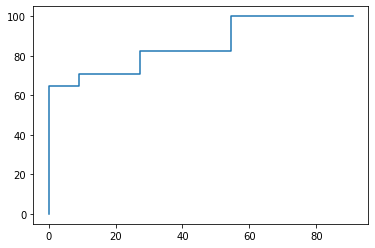

In [129]:
plt.plot(df.iloc[:, 1], 100 - df.iloc[:, 2])

In [136]:
def AUC(df):
    x = df.iloc[:, 1]
    y = df.iloc[:, 2]
    area = 0
    for i in range(len(x)-1):
        area += (x[i] + x[i+1])/2 * (y[i+1]-y[i])
    return area

In [141]:
area = AUC(df)
print('AUC: %.1f' % area)

AUC: 1336.9
